# Classificatie met ResNet

- Minor Applied AI
- 14 march 2023
- Frank Aldershoff & Michiel Bontenbal


## Importeer libraries

In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.image import imread

from sklearn.datasets import load_sample_image
import tensorflow as tf
from tensorflow import keras

## Laad en toon foto's

(427, 640, 3)
(3, 427, 640, 3)


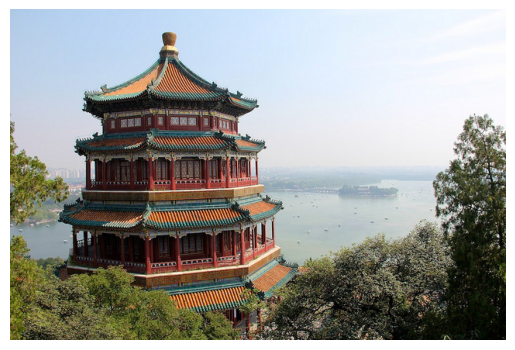

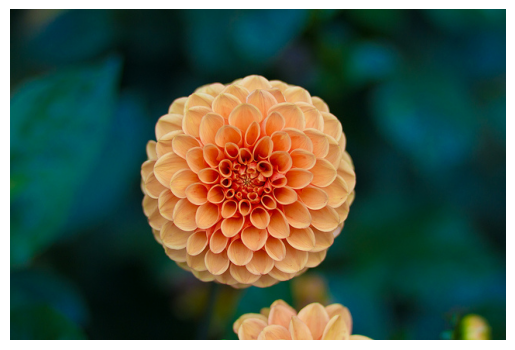

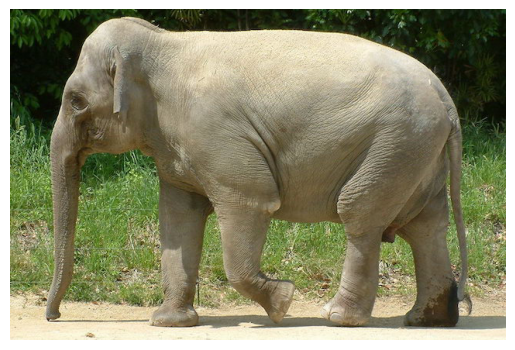

In [14]:
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
elephant = imread("elephant.jpg") 
print(elephant.shape)
images = np.array([china, flower, elephant])

batch_size, height, width, channels = images.shape
print(images.shape)

plt.imshow(images[0, :, :, :])
plt.axis("off") 
plt.show()

plt.imshow(images[1, :, :, :]) 
plt.axis("off") 
plt.show()

plt.imshow(images[2, :, :, :]) 
plt.axis("off") 
plt.show()

## Wijzig formaat van foto's

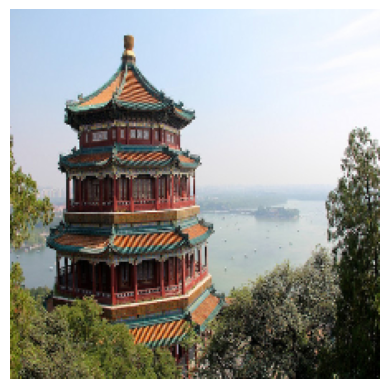

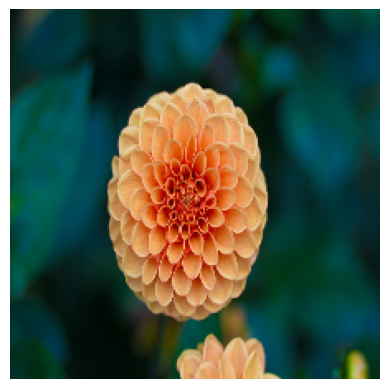

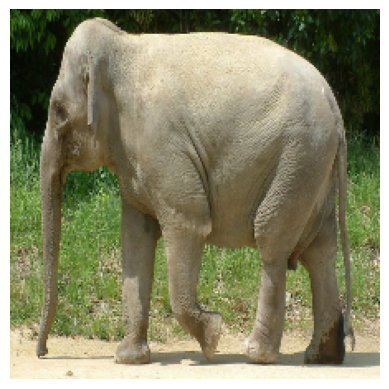

In [9]:
images_resized = tf.image.resize(images, [224, 224])
#images_resized = tf.image.resize_with_pad(images, 224, 224)
#images_resized = tf.image.resize_with_crop_or_pad(images, 224, 224)

plt.imshow(images_resized[0, :, :, :]/255)
plt.axis("off") 
plt.show()

plt.imshow(images_resized[1, :, :, :]/255) 
plt.axis("off") 
plt.show()

plt.imshow(images_resized[2, :, :, :]/255) 
plt.axis("off") 
plt.show()

## Laad pre-trained model

zie https://keras.io/api/applications/


In [10]:
model = keras.applications.resnet50.ResNet50(weights="imagenet")

## Bepaal classificatie van de afbeeldingen met ResNet50

In [11]:
inputs = keras.applications.resnet50.preprocess_input(images_resized)

Y_proba = model.predict(inputs, steps=1)

top_K = keras.applications.resnet50.decode_predictions(Y_proba, top=5)

for image_index in range(len(images)):
    print("Image #{}".format(image_index))
    for class_id, name, y_proba in top_K[image_index]:
        print("  {} - {:12s} {:.2f}%".format(class_id, name, y_proba * 100))
    print()

1/1 [==============================] - 1s 1s/step
Image #0
  n02825657 - bell_cote    82.35%
  n03877845 - palace       6.75%
  n03781244 - monastery    4.19%
  n02980441 - castle       3.16%
  n03028079 - church       1.00%

Image #1
  n03530642 - honeycomb    49.83%
  n13040303 - stinkhorn    33.96%
  n02206856 - bee          4.35%
  n11939491 - daisy        3.23%
  n12985857 - coral_fungus 2.66%

Image #2
  n02504013 - Indian_elephant 81.07%
  n02504458 - African_elephant 10.81%
  n01871265 - tusker       8.10%
  n01704323 - triceratops  0.01%
  n02408429 - water_buffalo 0.00%



**OPDRACHT**: wat is de invloed van de verschillende manieren van "resizen" op de classificatie?